**Реализация примеров из книги Титова**

In [2]:
import scipy.linalg
import numpy as np
from numpy import *
from scipy import optimize
import matplotlib.pyplot as plt

**Пример 3.1.** Методом наименьших квадратов построить аппроксимирующую параболу y^m=c0+c1x+c2x^2 для функции, заданной в табличном виде: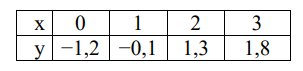


Значения коэффициентов
с(0)=-1.2600000
с(1)=1.4900000
с(2)=-0.1500000
Уравнение кривой Ym=-1.260000+(1.490000)*x+(-0.150000)*x^2
Сумма площадей квадратов отклонений равна 0.072000


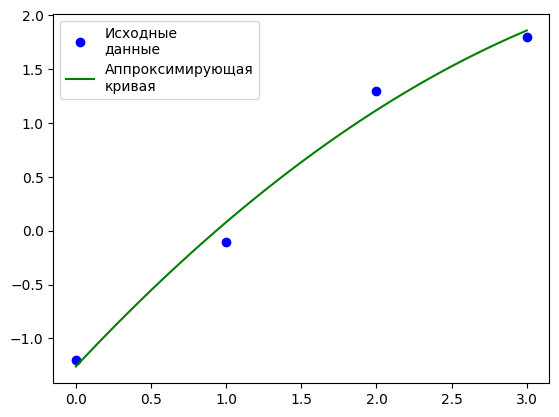

In [4]:
# Задаём исходные данные из таблицы
x = np.array([0, 1, 2, 3])
y = np.array([-1.2, -0.1, 1.3, 1.8])
# Создаём матрицу 
A=x[:,np.newaxis]**[0,1,2]
# Вычисление решения уравнения методом наименьших квадратов для исходной матрицы
res=linalg.lstsq(A,y,rcond=None)
# Вывод значений коэффициентов
print("Значения коэффициентов")
for i in range(3):
    print("с(%i)=%.7f" % (i,res[0][i]))
# Извлечение коэффициентов из уравнения
a, b, c = res[0][0], res[0][1], res[0][2]
# Вывод уравнения апроксимирующей матрицы
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a,b,c))
# Вычисление суммы квадратов отклонений
v=res[1]
# Вывод суммы площадей квадратов откленений
print("Сумма площадей квадратов отклонений равна %.6f" % v)
# Генерация значений апроксимирующей кривой
x1 = np.linspace(min(x), max(x), 100);
ym= a+b*x1+c*x1**2
# Построение графика
plt.plot(x, y, 'bo', label="Исходные\nданные")
plt.plot(x1,ym, label="Аппроксимирующая\nкривая",c='g')
# Вывод легенды и графика на экран
plt.legend()
plt.show()

**Пример 3.2.** Методом наименьших квадратов определить коэффициенты аппроксимирующей кривой Y=c1x*cos(c2x)+c3 для таблично
заданной функции:
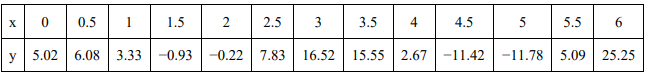

Коэффициенты подобранной зависимости:
a= 4.000196
b= 1.999998
c= 4.999244
Уравнение кривой Y=4.000196*x*cos(1.999998x)+4.999244
Сумма площадей квадратов отклонений равна 0.001124


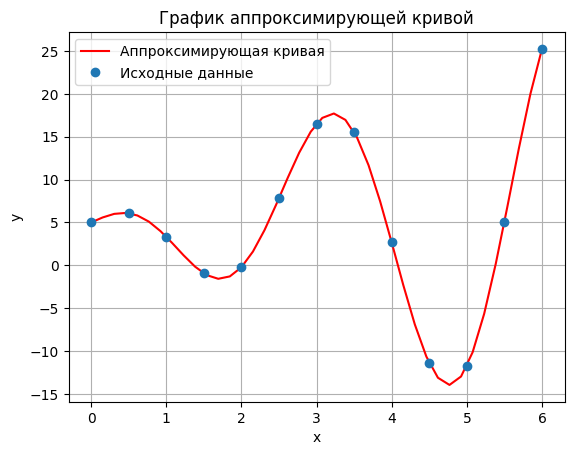

In [10]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
# задаем исходные данные x и y
x=np.linspace(0,6,13);
y=[5.02,6.08,3.33,-0.93,-0.22,7.83,16.52,15.55, 2.67,-11.42,-11.78,5.09,25.25];
# задаем аппроксимирующую кривую как функцию
# аргумента х и трех искомых параметров a, b и c
def f(x, a, b, c):
    return a*x*np.cos(b*x)+c;
def g(x0):
    return y- f(x, *x0) # определяем функцию невязок
x0_init = (1,2,3) # задаем начальное приближение
# передаем в функцию leastsq требуемые параметры
x_opt, _ = optimize.leastsq(g, x0_init)
a, b, c =x_opt[0], x_opt[1], x_opt[2]
print("Коэффициенты подобранной зависимости:")
print("a= %.6f" % a)
print("b= %.6f" % b)
print("c= %.6f" % c)
print("Уравнение кривой Y=%.6f*x*cos(%.6fx)+%.6f" % (a,b,c))
v=np.sum((f(x, a, b, c)-y)**2)
print("Сумма площадей квадратов отклонений равна %.6f" % v)
x1=np.linspace(0,6,40) # задаем пределы значений х
# для построения графика полученной кривой
w=f(x1,a,b,c) # вычисляем
# значения полученной кривой в этих точках и строим график
plt.plot(x1,w,'r')
plt.plot(x,y,'o')
plt.title("График аппроксимирующей кривой") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid() # наносим на график сетку
plt.legend(('Аппроксимирующая кривая', 'Исходные данные'))
plt.show()

**Согласно вариантам, провести аппроксимацию МНК многочленами 1, 2 степени любым доступным способом. Определить степень аппроксимации. Построить графики  полученных функций**

**Вариант 8:**
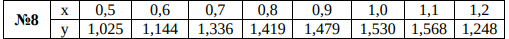

Значения коэффициентов для многочлена первой степени
с(0)=-1.2600000
с(1)=1.4900000
Значения коэффициентов для многочлена второй степени
с(0)=-1.2600000
с(1)=1.4900000
с(2)=-0.1500000
Уравнение кривой Ym=-1.260000+(1.490000)*x+(-0.150000)*x^2
Сумма площадей квадратов отклонений равна 0.000136


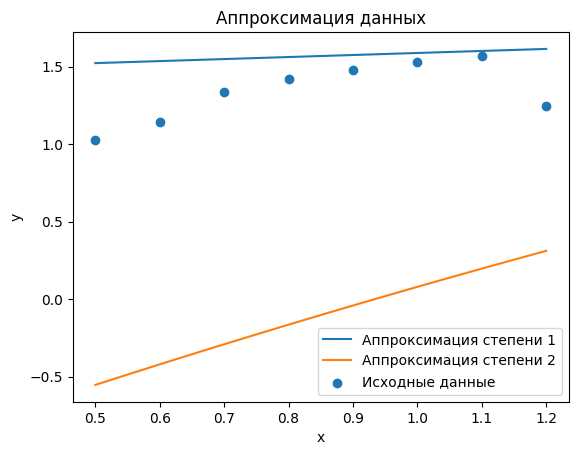

In [20]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
# Ввод исходных данных
x = np.array ([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
y = np.array ([1.025, 1.144, 1.336, 1.419, 1.479, 1.530, 1.568, 1.248])
# Построение матрицы A для многочлена первой степени
A1 = np.vstack([np.ones_like(x), x]).T
# Вычисление решения уравнения методом наименьших квадратов для исходной матрицы для многочлена первой степени
res1 = linalg.lstsq(A1, y)
# Вывод коэффициентов
print("Значения коэффициентов для многочлена первой степени")
for i in range(2):
    print("с(%i)=%.7f" % (i,res[0][i]))
a, b = res[0][0], res[0][1]
# Построение матрицы A для многочлена второй степени
A2 = np.vstack([np.ones_like(x), x, x**2]).T
# Вычисление решения уравнения методом наименьших квадратов для исходной матрицы для многочлена второй степени
res1 = linalg.lstsq(A2, y)
# Вывод коэффициентов на экран
print("Значения коэффициентов для многочлена второй степени")
for i in range(3):
    print("с(%i)=%.7f" % (i,res[0][i]))
a2, b2, c2 = res[0][0], res[0][1], res[0][2]
print("Уравнение кривой Ym=%.6f+(%.6f)*x+(%.6f)*x^2" % (a2,b2,c2))
v2=res2[1]
print("Сумма площадей квадратов отклонений равна %.6f" % v2)
# Генерация значений для построения графиков
x1 = np.linspace(min(x), max(x), 100)
y1 = a1+b1*x1
y2 = a2+b2*x1+c2*x1**2
# Построение графиков
plt.plot(x1,y1, label='Аппроксимация степени 1')
plt.plot(x1,y2, label='Аппроксимация степени 2')
plt.scatter(x, y, label='Исходные данные')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация данных')
plt.show()